# Bonus_track. Итоговый проект
## Брунько Павел Дмитриевич, А4130 

## Описание набора данных

        Набор данных fastfood.csv содержит информацию о различных продуктах питания быстрого приготовления (фастфуде) от нескольких известных сетевых ресторанов. В наборе данных представлена информация о калорийности, содержания жиров, белков, углеводов, натрия, кальция и других важных элементов продуктов питания.
        Набор данных взят из открытого источника Kaggle: https://www.kaggle.com/datasets/ulrikthygepedersen/fastfood-nutrition?select=fastfood.csv
Признак | Описание
---------------|---------------
restaurant | Название сетевого ресторана
item | Название продукта (блюда)
calories | Калорийность, ккал
cal_fat | Содержание калорий в молекулах жиров, ккал
total_fat | Суммарное содержание жиров на 100 г продукта, г
sat_fat | Содержание насыщенных жиров (saturated fat), %
trans_fat | Содержание транс-жиров, %
cholesterol | Содержание холестерина, мг
sodium | Содержание натрия, мг
total_carb | Суммарное содержание углеводов на 100 г продукта, г
fiber | Содержание волокон (клетчатки), г
sugar | Содержание сахара (простых сахаров), г
protein | Содержание белков на 100 г продукта, г
vit_a | Содержание витаминов группы А, мг
vit_c | Содержание витамина С, мг
calcium | Содержание кальция, мг
salad | Наличие салата в продукте

## Загрузка и предобработка набора данных

### Импортируем необходимые библиотеки

In [1]:
#NumPy для работы с численными значениями
import numpy as np
#Pandas для чтения файла с набором данных
import pandas as pd
#MatPlotLib для построения графиков и другой визуализации
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
#Scikit-Learn для машинного обучения (кластеризации)
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
#Данная строчка необходима для корректного отображения графиков
%matplotlib inline 

### Загружаем данные в датафрейм 

In [2]:
fastfood_df =pd.read_csv('fastfood.csv', sep = ',', index_col = 1, header = 0, decimal = ',' )
fastfood_df

,restaurant,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
item,,,,,,,,,,,,,,,,
Artisan Grilled Chicken Sandwich,Mcdonalds,380,60,7,2,0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,Other
Single Bacon Smokehouse Burger,Mcdonalds,840,410,45,17,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,Other
Double Bacon Smokehouse Burger,Mcdonalds,1130,600,67,27,3,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,Other
Grilled Bacon Smokehouse Chicken Sandwich,Mcdonalds,750,280,31,10,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,Other
Crispy Bacon Smokehouse Chicken Sandwich,Mcdonalds,920,410,45,12,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Spicy Triple Double Crunchwrap,Taco Bell,780,340,38,10,0.5,50,1850,87,9.0,8,23.0,20.0,10.0,25.0,Other
Express Taco Salad w/ Chips,Taco Bell,580,260,29,9,1,60,1270,59,8.0,7,23.0,NaN,NaN,NaN,Other
Fiesta Taco Salad-Beef,Taco Bell,780,380,42,10,1,60,1340,74,11.0,7,26.0,NaN,NaN,NaN,Other


### Выведем все основные характеристики нашего датасета

In [3]:
fastfood_df.describe()

,calories,cal_fat,total_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium
count,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,503.000000,515.000000,514.000000,301.000000,305.000000,305.000000
mean,530.912621,238.813592,26.590291,72.456311,1246.737864,45.664078,4.137177,7.262136,27.891051,18.857143,20.170492,24.852459
std,282.436147,166.407510,18.411876,63.160406,689.954278,24.883342,3.037460,6.761301,17.683921,31.384330,30.592243,25.522073
min,20.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,330.000000,120.000000,14.000000,35.000000,800.000000,28.500000,2.000000,3.000000,16.000000,4.000000,4.000000,8.000000
50%,490.000000,210.000000,23.000000,60.000000,1110.000000,44.000000,3.000000,6.000000,24.500000,10.000000,10.000000,20.000000
75%,690.000000,310.000000,35.000000,95.000000,1550.000000,57.000000,5.000000,9.000000,36.000000,20.000000,30.000000,30.000000
max,2430.000000,1270.000000,141.000000,805.000000,6080.000000,156.000000,17.000000,87.000000,186.000000,180.000000,400.000000,290.000000


        Для дальнейшего удобства мы уберём колонку salad и restaurant, так как они не представляют для нас интереса. 
        Для проверки на наличие выбросов построим boxplot

In [4]:
fastfood_df.drop(columns=['salad'], inplace = True)
fastfood_df.drop(columns=['restaurant'], inplace = True)
fastfood_df

,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium
item,,,,,,,,,,,,,,
Artisan Grilled Chicken Sandwich,380,60,7,2,0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0
Single Bacon Smokehouse Burger,840,410,45,17,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0
Double Bacon Smokehouse Burger,1130,600,67,27,3,220,1920,63,3.0,18,70.0,10.0,20.0,50.0
Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0
Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Spicy Triple Double Crunchwrap,780,340,38,10,0.5,50,1850,87,9.0,8,23.0,20.0,10.0,25.0
Express Taco Salad w/ Chips,580,260,29,9,1,60,1270,59,8.0,7,23.0,NaN,NaN,NaN
Fiesta Taco Salad-Beef,780,380,42,10,1,60,1340,74,11.0,7,26.0,NaN,NaN,NaN


### Для дальнейшей работы с датафреймом заменим значения NaN на нули

In [5]:
fastfood_df = fastfood_df.replace(np.nan, 0)
fastfood_df

,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium
item,,,,,,,,,,,,,,
Artisan Grilled Chicken Sandwich,380,60,7,2,0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0
Single Bacon Smokehouse Burger,840,410,45,17,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0
Double Bacon Smokehouse Burger,1130,600,67,27,3,220,1920,63,3.0,18,70.0,10.0,20.0,50.0
Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0
Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Spicy Triple Double Crunchwrap,780,340,38,10,0.5,50,1850,87,9.0,8,23.0,20.0,10.0,25.0
Express Taco Salad w/ Chips,580,260,29,9,1,60,1270,59,8.0,7,23.0,0.0,0.0,0.0
Fiesta Taco Salad-Beef,780,380,42,10,1,60,1340,74,11.0,7,26.0,0.0,0.0,0.0


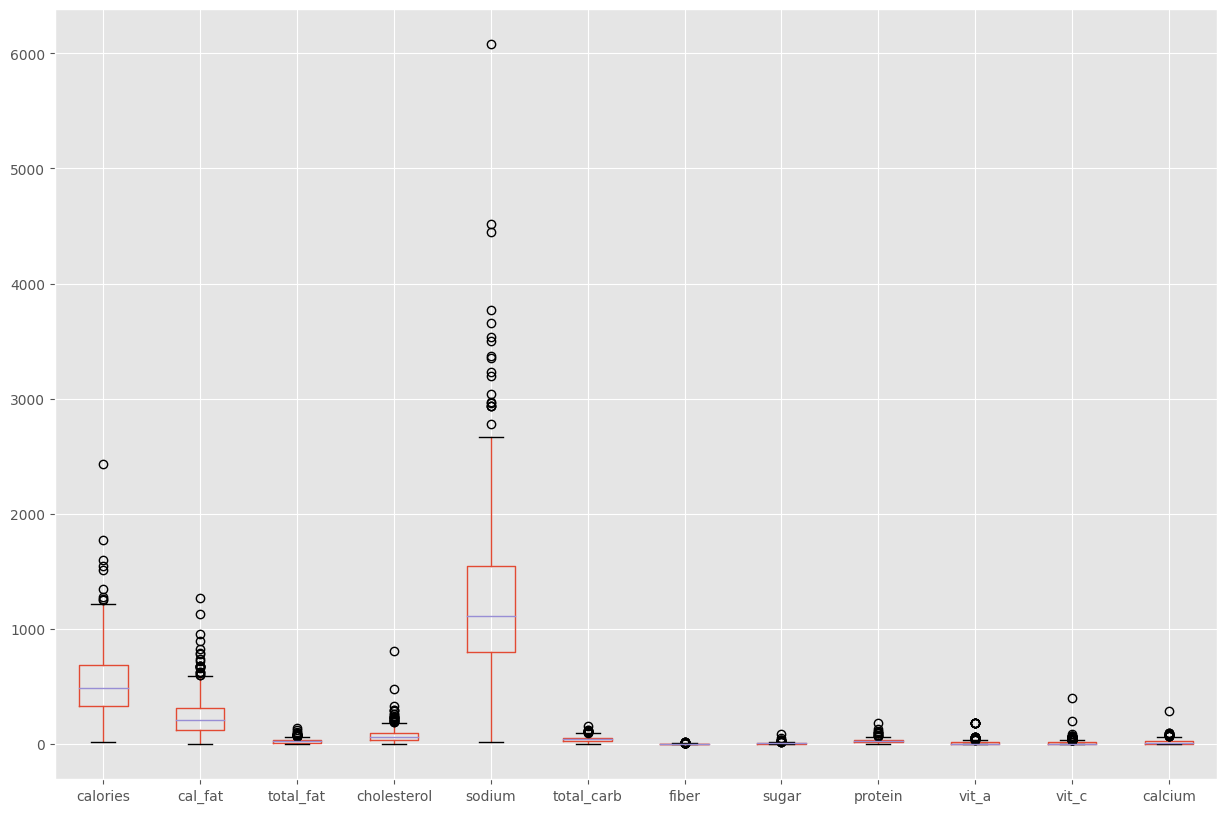

In [6]:
fastfood_df.boxplot(figsize=(15,10))
plt.show()

### Для лучшей визуализации применим нормировку, так как данные явно имеют различный порядок

In [7]:
standard_scaler = StandardScaler()
standard_df = pd.DataFrame(data = standard_scaler.fit_transform(fastfood_df), index = fastfood_df.index, columns = fastfood_df.columns)
standard_df

,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium
item,,,,,,,,,,,,,,
Artisan Grilled Chicken Sandwich,-0.534844,-1.075597,-1.065038,-0.959583,-0.554403,0.357275,-0.198377,-0.066940,-0.339775,0.553370,0.517918,-0.273278,0.315749,0.228628
Single Bacon Smokehouse Burger,1.095426,1.029718,1.000854,1.379571,1.233806,0.911958,0.483490,0.657139,-0.666238,1.589680,1.026616,-0.195436,0.315749,0.228628
Double Bacon Smokehouse Burger,2.123205,2.172604,2.196897,2.939006,3.022015,2.338287,0.976756,0.697365,-0.339775,1.589680,2.383146,-0.039752,0.315749,1.527270
Grilled Bacon Smokehouse Chicken Sandwich,0.776460,0.247744,0.239736,0.287966,0.041667,1.308160,1.005771,0.657139,-0.666238,1.589680,1.535315,-0.195436,0.511761,0.228628
Crispy Bacon Smokehouse Chicken Sandwich,1.378951,1.029718,1.000854,0.599853,0.041667,0.753477,1.063802,1.421444,-0.013312,1.589680,1.026616,-0.195436,0.315749,0.228628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Spicy Triple Double Crunchwrap,0.882782,0.608655,0.620295,0.287966,0.041667,-0.355890,0.875201,1.662804,1.619002,0.109237,-0.273391,0.349458,-0.076273,0.445069
Express Taco Salad w/ Chips,0.173969,0.127440,0.131005,0.132022,0.637737,-0.197409,0.033748,0.536459,1.292539,-0.038808,-0.273391,-0.428962,-0.468296,-0.637133
Fiesta Taco Salad-Beef,0.882782,0.849263,0.837758,0.287966,0.637737,-0.197409,0.135303,1.139858,2.271927,-0.038808,-0.103825,-0.428962,-0.468296,-0.637133


### Построим новый boxplot, чтобы убедиться, что всё в порядке

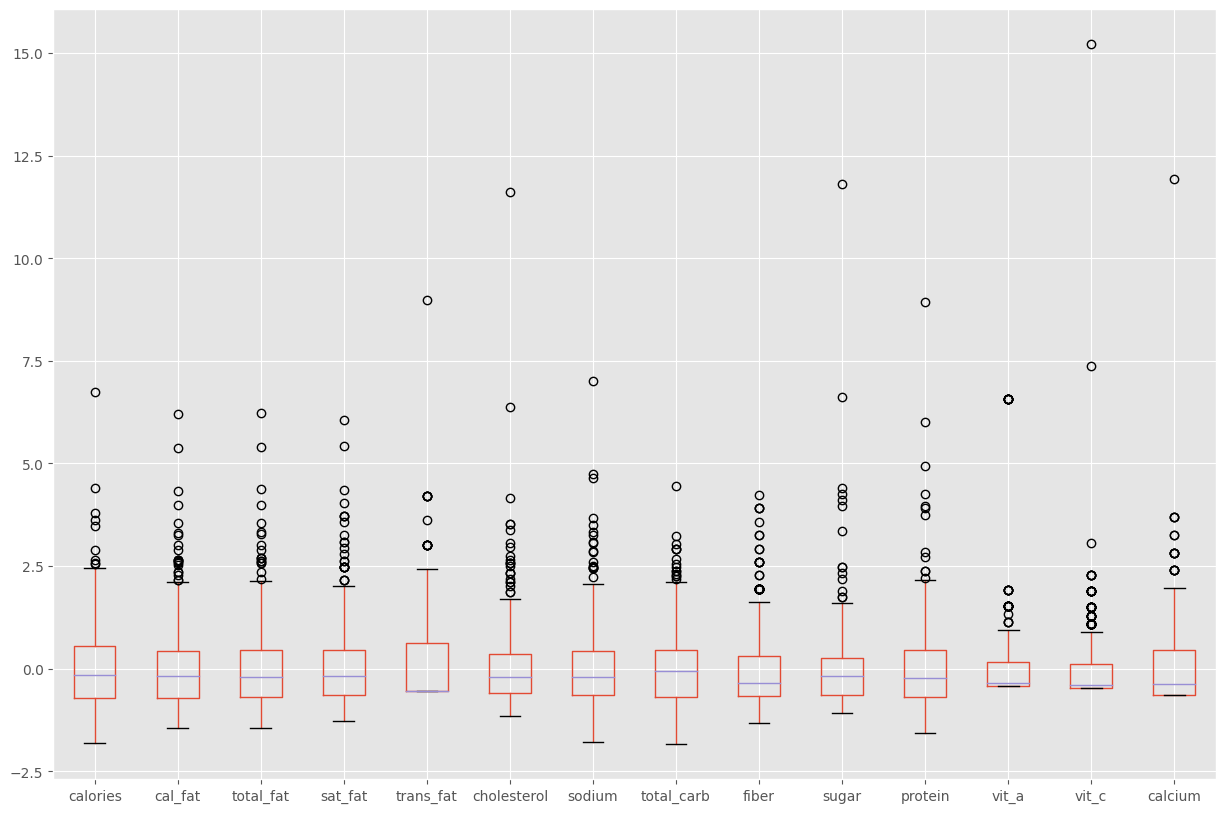

In [8]:
standard_df.boxplot(figsize=(15,10))
plt.show()

          На данном графике мы видим заметное количество выбросов, которые явно будут мешать чёткой интерпретации результатов кластеризации. Удалим выбросы со значениями после нормировки > 5.0

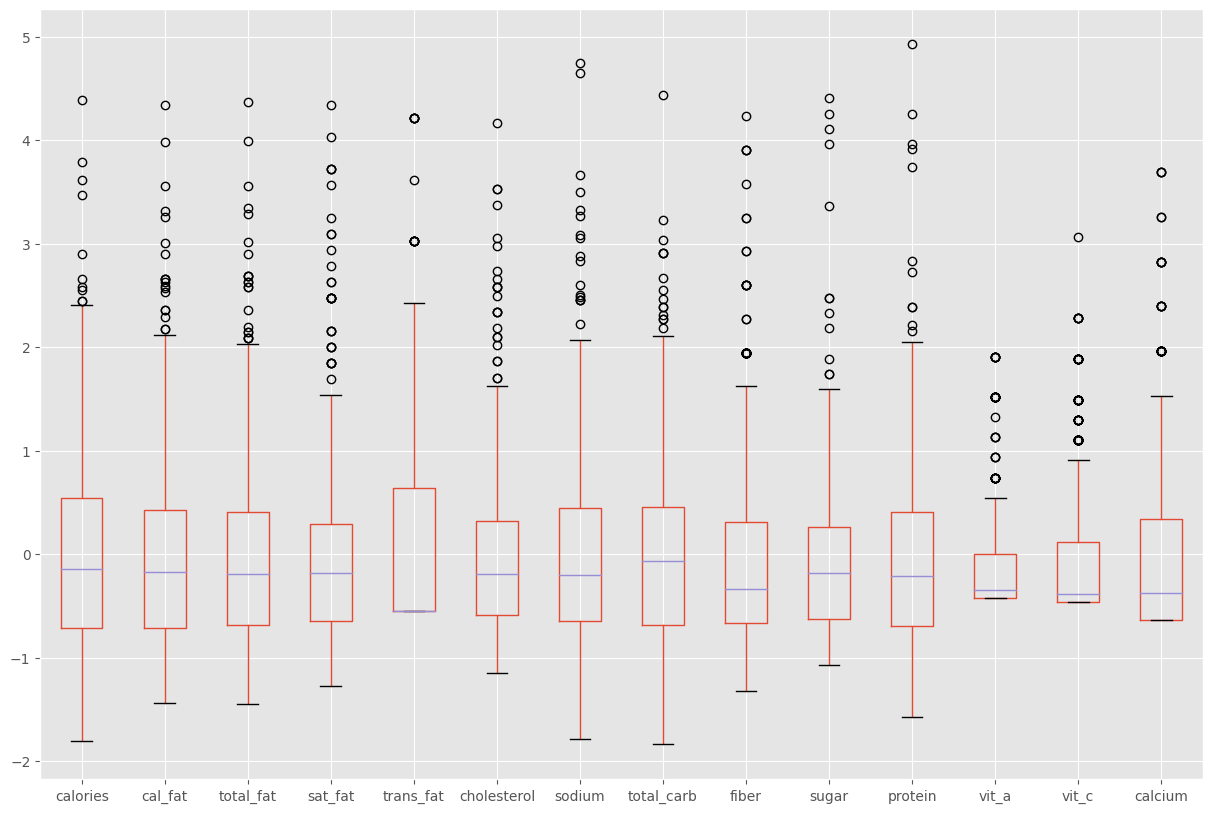

In [9]:
clean_df = standard_df.where(standard_df < 5.0, other = 0)
clean_df.boxplot(figsize=(15,10))
plt.show()

### Как мы видим, данные теперь имеют одинаковый порядок. С ними будет удобнее работать и проще интерпретировать результаты  

## Постановка задачи и построение модели 

        Наша цель - выяснить, могут ли наши данные быть распределены в различные кластеры по каким-либо признакам. Если могут, то определить оптимальное количество кластеров. Будем искать это оптимальное количество в диапазоне от 1 до 20. Также попытаемся интерпретировать смысл полученных кластеров.
        Для проведения кластеризации будет использован метод k-means. 

In [10]:
clust_df = clean_df.copy()
clust_df

,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium
item,,,,,,,,,,,,,,
Artisan Grilled Chicken Sandwich,-0.534844,-1.075597,-1.065038,-0.959583,-0.554403,0.357275,-0.198377,-0.066940,-0.339775,0.553370,0.517918,-0.273278,0.315749,0.228628
Single Bacon Smokehouse Burger,1.095426,1.029718,1.000854,1.379571,1.233806,0.911958,0.483490,0.657139,-0.666238,1.589680,1.026616,-0.195436,0.315749,0.228628
Double Bacon Smokehouse Burger,2.123205,2.172604,2.196897,2.939006,3.022015,2.338287,0.976756,0.697365,-0.339775,1.589680,2.383146,-0.039752,0.315749,1.527270
Grilled Bacon Smokehouse Chicken Sandwich,0.776460,0.247744,0.239736,0.287966,0.041667,1.308160,1.005771,0.657139,-0.666238,1.589680,1.535315,-0.195436,0.511761,0.228628
Crispy Bacon Smokehouse Chicken Sandwich,1.378951,1.029718,1.000854,0.599853,0.041667,0.753477,1.063802,1.421444,-0.013312,1.589680,1.026616,-0.195436,0.315749,0.228628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Spicy Triple Double Crunchwrap,0.882782,0.608655,0.620295,0.287966,0.041667,-0.355890,0.875201,1.662804,1.619002,0.109237,-0.273391,0.349458,-0.076273,0.445069
Express Taco Salad w/ Chips,0.173969,0.127440,0.131005,0.132022,0.637737,-0.197409,0.033748,0.536459,1.292539,-0.038808,-0.273391,-0.428962,-0.468296,-0.637133
Fiesta Taco Salad-Beef,0.882782,0.849263,0.837758,0.287966,0.637737,-0.197409,0.135303,1.139858,2.271927,-0.038808,-0.103825,-0.428962,-0.468296,-0.637133


### Для определения оптимального количетсва кластеров построим график каменистой осыпи (локтя)

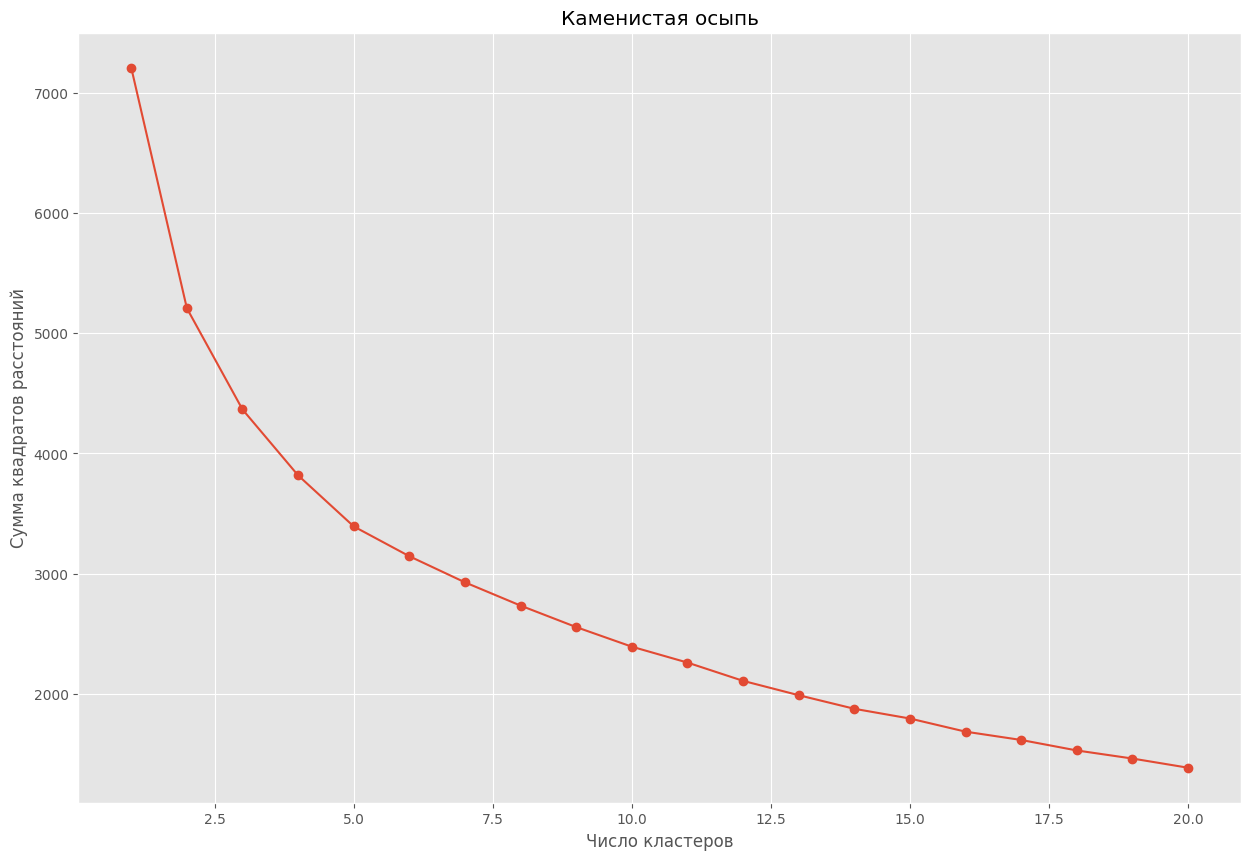

In [11]:
K = range(1, 21)
models = [KMeans(n_clusters = k, random_state = 111, n_init = 100, max_iter = 10000).fit(standard_df) for k in K]
dist = [model.inertia_ for model in models]

plt.figure(figsize=(15,10))
plt.plot(K, dist, marker='o')
plt.xlabel('Число кластеров')
plt.ylabel('Сумма квадратов расстояний')
plt.title('Каменистая осыпь')
plt.show()

        Как видно из графика каменистой осыпи оптимальное количество кластеров лежит в диапазоне от 5 до 8. Дальше кривая бесконечно приближается к оси Х, а значит большее количество кластеров будет излишним.

### Проведём кластеризацию для каждого случая от 5 до 8 кластеров и выведем полученные результаты. Кластеризацию будем проводить по следующим признакам: калорийность, содержание углеводов и содержание белков, так как данные признаки неплохо коррелируют 

            calories  total_carb   protein
5_clusters                                
0           1.111670    1.997187  0.866470
1          -0.052623    0.196739 -0.131174
2           2.251677    0.521374  1.846186
3          -0.879417   -0.830193 -0.677332
4           0.639115    0.203034  0.503743


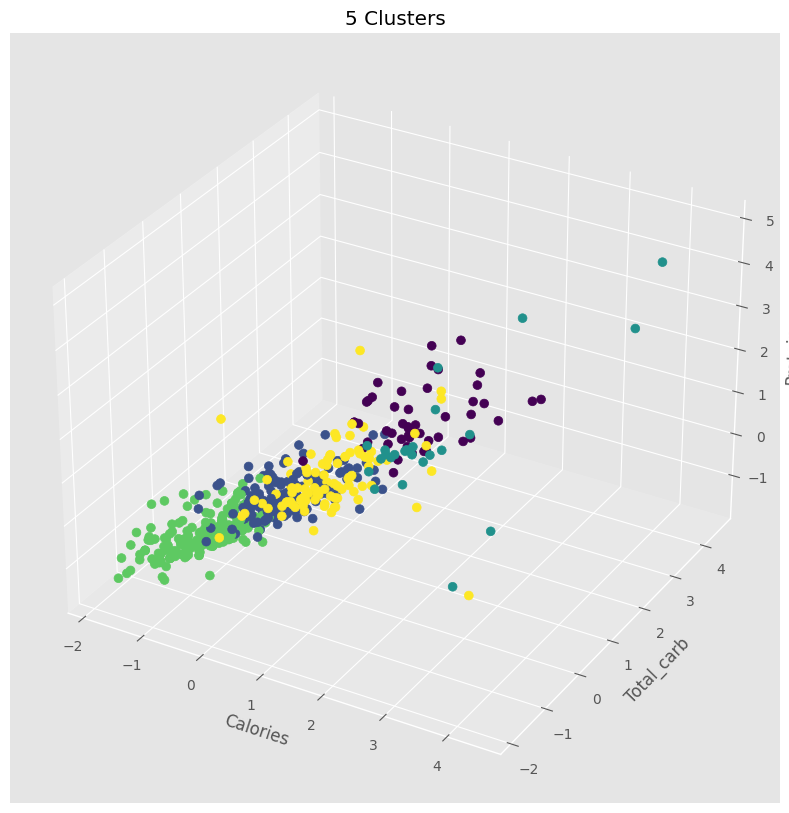

            calories  total_carb   protein
6_clusters                                
0           1.111670    1.997187  0.866470
1          -0.048341    0.205504 -0.133554
2          -1.068226   -0.997180 -0.517849
3           2.251677    0.521374  1.846186
4           0.639115    0.203034  0.503743
5          -0.828629   -0.788373 -0.713296


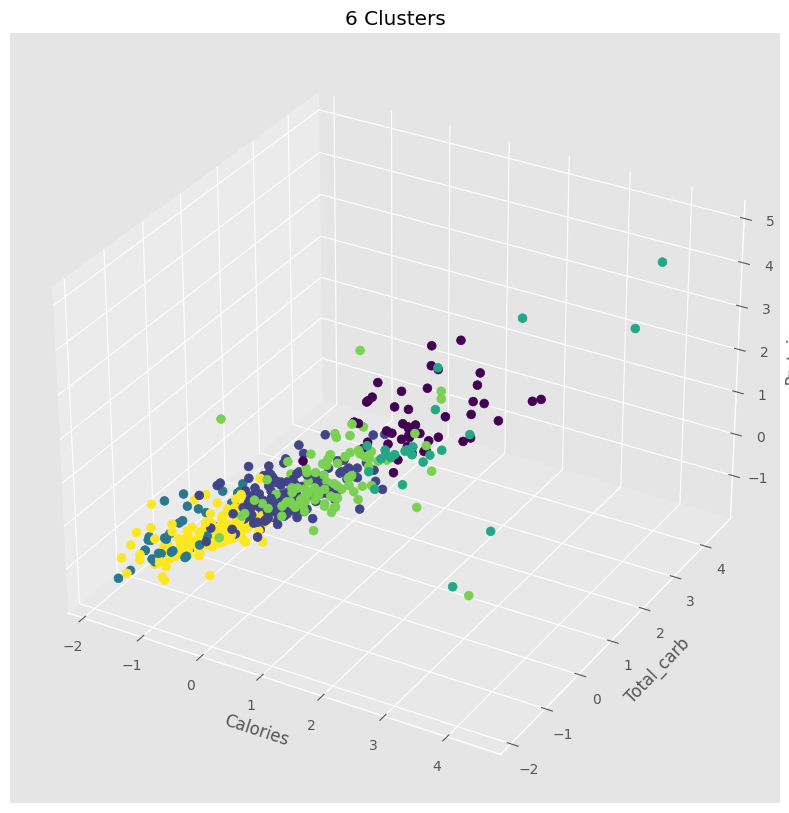

            calories  total_carb   protein
7_clusters                                
0           3.122632    1.477761  4.157939
1           1.111670    1.997187  0.866470
2          -1.068226   -0.997180 -0.517849
3          -0.828629   -0.788373 -0.713296
4           1.999163    0.234759  1.388357
5           0.629563    0.209618  0.464736
6          -0.048341    0.205504 -0.133554


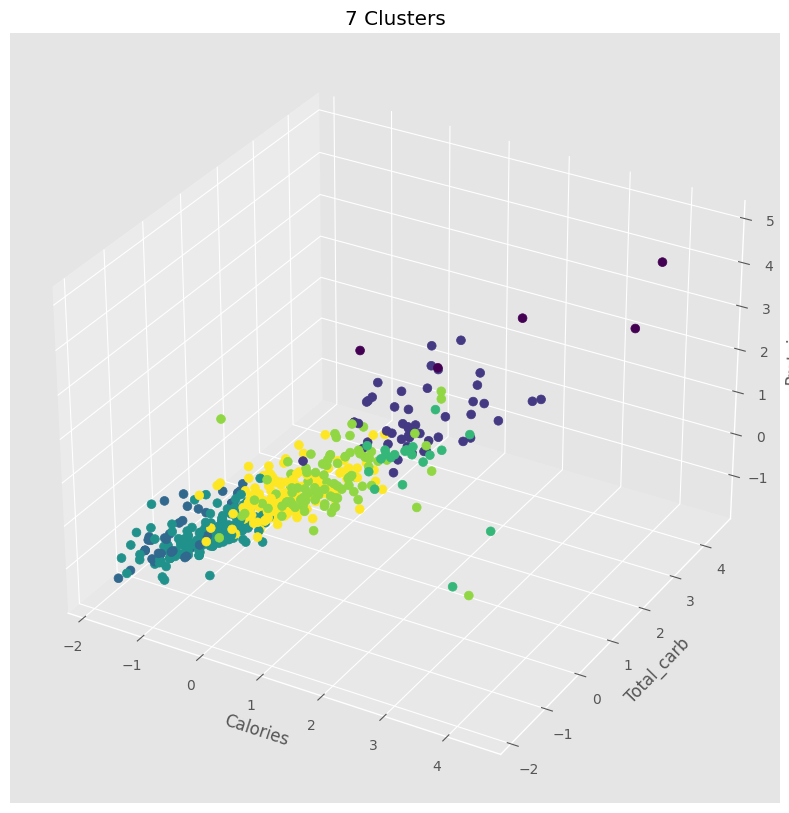

            calories  total_carb   protein
8_clusters                                
0           0.894276    1.953088  0.609575
1           0.629563    0.209618  0.464736
2          -0.828629   -0.788373 -0.713296
3          -0.048341    0.205504 -0.133554
4           3.122632    1.477761  4.157939
5          -1.068226   -0.997180 -0.517849
6           1.999163    0.234759  1.388357
7           1.842902    2.145523  1.730573


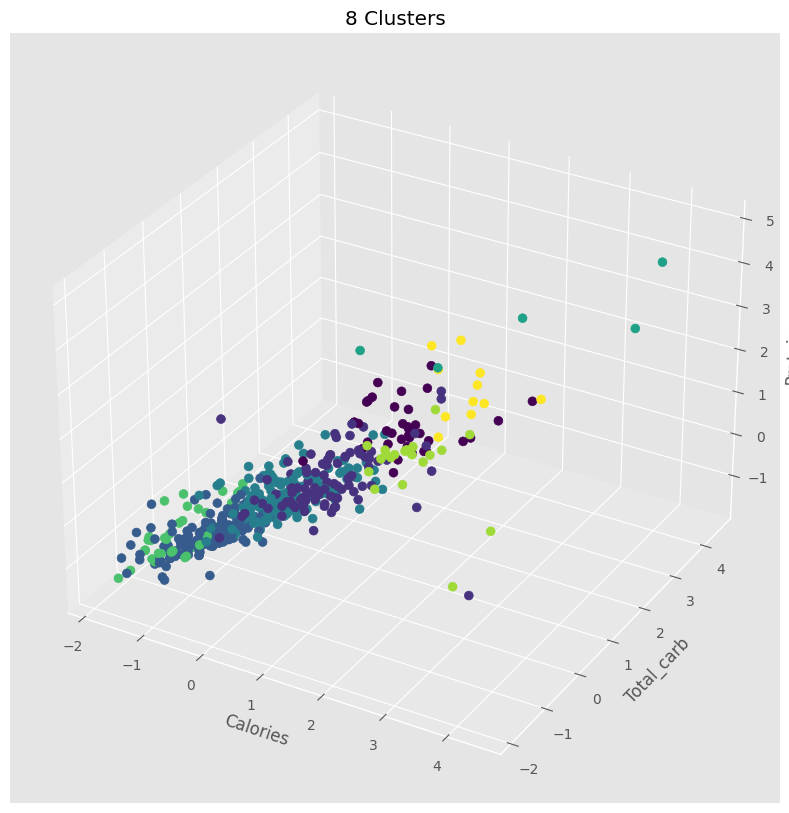

In [12]:
for i in range(5,9):
  model = KMeans(n_clusters = i, random_state = 111, n_init = 100, max_iter = 10000)
  model.fit(clust_df)

  clust_df[f'{i}_clusters'] = model.labels_

  print(clust_df.groupby(f'{i}_clusters')[['calories','total_carb','protein']].mean())

  threedee = plt.figure(figsize=(15,10)).add_subplot(projection='3d')
  threedee.scatter(clust_df["calories"], clust_df["total_carb"], clust_df["protein"], c = clust_df[f'{i}_clusters'], alpha = 1, s =40)
  threedee.set_xlabel('Calories')
  threedee.set_ylabel('Total_carb')
  threedee.set_zlabel('Protein')
  threedee.set_title(f'{i} Clusters')
  plt.show()

### Как видно из полученных графиков наиболее интерпретируемыми являются разбиения на 5 или 6 кластеров. Приведём произвольную интерпретацию результатов проведённой кластеризации

# Оценка модели и результатов

### Итоги проведённой кластеризации:

### 5 кластеров

In [81]:
final_df = clust_df.groupby('5_clusters')[['calories','total_carb','protein']].mean()
final_df

,calories,total_carb,protein
5_clusters,,,
0,0.502636,0.397019,0.288073
1,-0.704172,-0.925108,-0.110105
2,-0.703693,-0.581474,-0.572335
3,0.927428,1.558969,0.849800
4,1.371351,0.375552,1.110686


При разбиении на 5 кластеров подходит следующая интепретация:
*    0 кластер - в него вошли продукты с достаточно большим количеством калорий, а также с примерно одинаковым количеством углеводов и белков (выше среднего); 
*    1 кластер - здесь содержатся продукты с маленьким количеством калорий, с низким содержанием углеводов и низким количеством белков (однако белков больше, чем углеводов);
*    2 кластер - данный кластер примерно совпадает с 1 кластером по количеству калорий, но здесь выше содержание углеводов и ниже содержание белков; 
*    3 кластер - в этот кластер попали продукты с большим количеством калорий, большим содержанием углеводов и довольно большим количеством белков; 
*    4 кластер - сюда были отнесены продукты с очень большой калорийностью, высоким содержанием белков, но относительно низким содержанием углеводов;

### 6 кластеров

In [82]:
final_df = clust_df.groupby('6_clusters')[['calories','total_carb','protein']].mean()
final_df

,calories,total_carb,protein
6_clusters,,,
0,0.407150,0.380708,0.187191
1,1.349468,0.266653,1.129979
2,0.927428,1.558969,0.849800
3,-0.704172,-0.925108,-0.110105
4,0.000000,0.657139,0.000000
5,-0.758223,-0.644134,-0.596810


При разбиении набора данных на 6 кластеров:
*    0 кластер - данный кластер похож на 0 кластер при разбиении набора данных на 5 кластеров, однако здесь все три параметра имеют несколько меньшие значения;
*    1 кластер - этот кластер напоминает 4 кластер из прошлого случая, значения параметров почти идентичны, но количество углеводов несколько меньше; 
*    2 кластер - почти полностью повтооряет 3 кластер из прошлого случая;
*    3 кластер - почти полностью повтояет 1 кластер из прошлого случая;
*    4 кластер - новый кластер, отличный от всех кластеров из прошлого случая. Сюда вошли продукты со средним калоражем, средним содержанием белков и достаточно большим содержанием углеводов;
*    5 кластер - данный кластер очень близок к 2 кластеру из предыдущего случая;

        После анализа разбиения исходного набора данных на 5 и 6 кластеров стало очевидно, что данное разделение достаточно хорошо интерпретируется. Однако интуитивно напрашивается деление на 4 кластера.

### Проведём разделение на 4 кластера

            calories  total_carb   protein
4_clusters                                
0          -0.042918    0.572106  0.097224
1           0.208408    0.178725 -0.030460
2           0.282531   -0.035516  0.343648
3          -0.942412   -0.906311 -0.780071


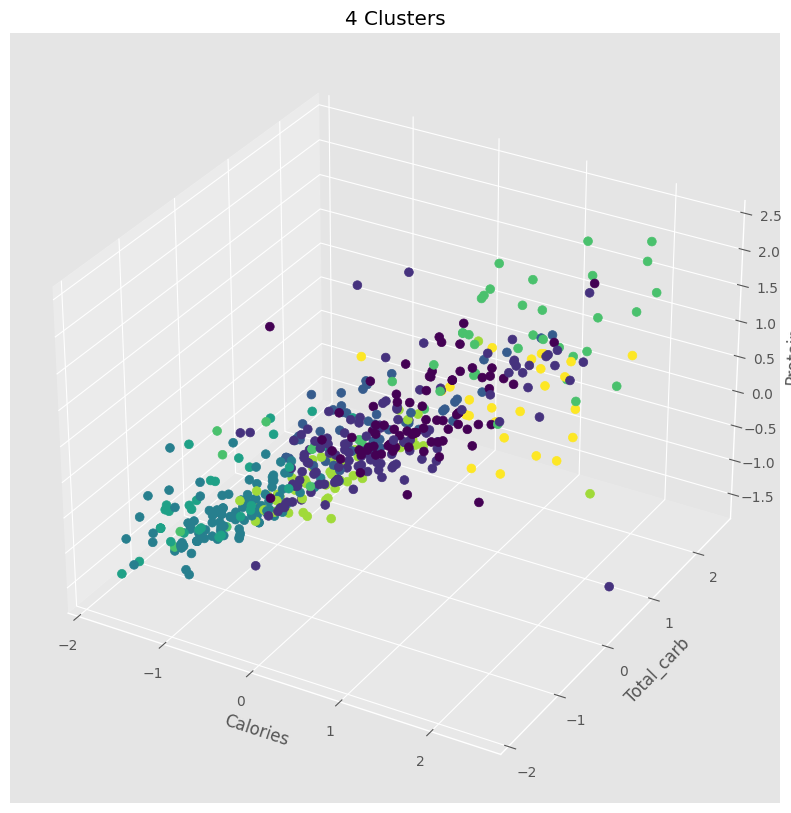

In [88]:
model = KMeans(n_clusters = 4, random_state = 111, n_init = 100, max_iter = 10000)
model.fit(clust_df)

clust_df[f'{4}_clusters'] = model.labels_

print(clust_df.groupby(f'{4}_clusters')[['calories','total_carb','protein']].mean())

threedee = plt.figure(figsize=(15,10)).add_subplot(projection='3d')
threedee.scatter(clust_df["calories"], clust_df["total_carb"], clust_df["protein"], c = clust_df[f'{i}_clusters'], alpha = 1, s =40)
threedee.set_xlabel('Calories')
threedee.set_ylabel('Total_carb')
threedee.set_zlabel('Protein')
threedee.set_title(f'{4} Clusters')
plt.show()

        Как видно из последнего графика разделение на 4 кластера дало неплохие результаты, однако границы между кластерами весьма размыты. Возможно имеет смысл применить другую модель для кластеризации.